# Проект: ABC/XYZ и RFM анализ продаж одежды через маркетплейсы

---

## Этап 5: RFM-анализ клиентов

**Концепция**  
RFM-анализ оценивает клиентов по трем показателям:
- **R (Recency)** - дни с последней покупки (меньше - лучше)
- **F (Frequency)** - количество покупок (больше - лучше)
- **M (Monetary)** - общая сумма покупок (больше - лучше)

In [1]:
# загружаю библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime, timedelta

In [2]:
# Настройки визуализации
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
sns.set_palette("Set2")

In [3]:
# загружаю данные (таблица, подготовленная на этапе 1 EDA, с временными столбцами)
df = pd.read_csv('clothing_marketplace_sales.csv')

In [4]:
# привожу order_date к datetime
df['order_date'] = pd.to_datetime(df['order_date'])

,customer_count,r_mean,f_mean,m_mean,customers_pct
segment_name,,,,,
champions,73,6.34,78.68,439895.82,16.2
loyal_customers,45,28.93,20.73,124442.68,10.0
cant_lose_them,2,459.00,2.00,45761.48,0.4
Other,128,85.12,6.85,39187.97,28.4
about_to_sleep,5,103.40,1.40,23152.74,1.1
at_risk,14,304.71,3.57,21105.86,3.1
need_attention,38,146.32,3.58,20022.25,8.4
potential_loyalists,5,10.00,3.00,17018.09,1.1
hibernating,47,264.77,2.23,11147.34,10.4


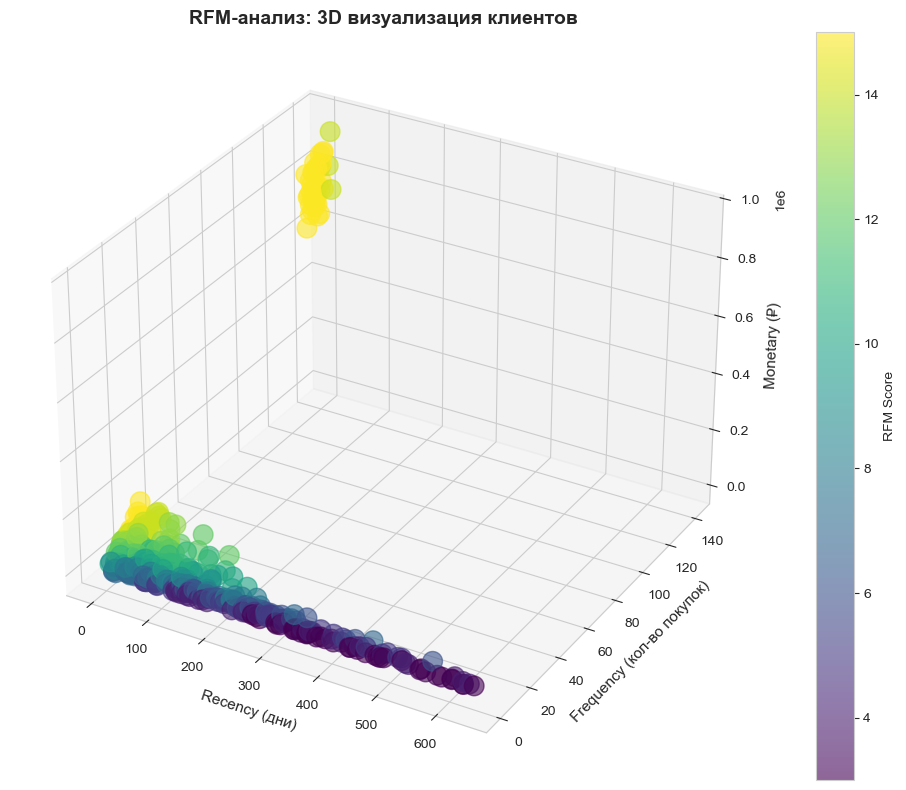

In [5]:
# Шаг 1: Расчет RFM метрик
reference_date = df['order_date'].max() + timedelta(days=1)

rfm = df.groupby('customer_id').agg({
    'order_date': lambda x: (reference_date - x.max()).days,  # Recency
    'order_id': 'count',                                       # Frequency
    'order_amount': 'sum'                                      # Monetary
}).rename(columns={
    'order_date': 'recency',
    'order_id': 'frequency',
    'order_amount': 'monetary'
}).reset_index()

# Шаг 2: Квантильная классификация (1-5 для каждого показателя, где 5 - лучше)
rfm['r_score'] = pd.qcut(rfm['recency'], q=5, labels=[5, 4, 3, 2, 1], duplicates='drop')
rfm['f_score'] = pd.qcut(rfm['frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5], duplicates='drop')
rfm['m_score'] = pd.qcut(rfm['monetary'], q=5, labels=[1, 2, 3, 4, 5], duplicates='drop')

# Шаг 3: Конвертация из категорийных в числовые значения
rfm['r_score'] = rfm['r_score'].astype(int)
rfm['f_score'] = rfm['f_score'].astype(int)
rfm['m_score'] = rfm['m_score'].astype(int)

# Шаг 4: Создание RFM сегментов
rfm['segment'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)

# Шаг 5: Присвоение наименований сегментов
segment_labels = {
    # Champions (Чемпионы)
    '555': 'champions',
    '554': 'champions',
    '545': 'champions',
    '544': 'champions',
    
    # Loyal Customers (Лояльные клиенты)
    '455': 'loyal_customers',
    '454': 'loyal_customers',
    '445': 'loyal_customers',
    '444': 'loyal_customers',
    '435': 'loyal_customers',
    
    # Potential Loyalists (Потенциально лояльные)
    '553': 'potential_loyalists',
    '552': 'potential_loyalists',
    '551': 'potential_loyalists',
    '542': 'potential_loyalists',
    '541': 'potential_loyalists',
    '533': 'potential_loyalists',
    '532': 'potential_loyalists',
    '531': 'potential_loyalists',
    '522': 'potential_loyalists',
    '521': 'potential_loyalists',
    
    # Recent Customers (Недавние клиенты)
    '512': 'recent_customers',
    '511': 'recent_customers',
    '421': 'recent_customers',
    '412': 'recent_customers',
    '411': 'recent_customers',
    
    # Promising (Перспективные)
    '321': 'promising',
    '312': 'promising',
    '311': 'promising',
    '322': 'promising',
    
    # New Customers (Новые клиенты)
    '155': 'new_customers',
    '154': 'new_customers',
    '153': 'new_customers',
    '152': 'new_customers',
    
    # Need Attention (Требуют внимания)
    '332': 'need_attention',
    '331': 'need_attention',
    '323': 'need_attention',
    '233': 'need_attention',
    '232': 'need_attention',
    '223': 'need_attention',
    '224': 'need_attention',
    
    # About To Sleep (Засыпающие)
    '213': 'about_to_sleep',
    '214': 'about_to_sleep',
    '313': 'about_to_sleep',
    '314': 'about_to_sleep',
    '413': 'about_to_sleep',
    '414': 'about_to_sleep',
    
    # At Risk (В группе риска)
    '143': 'at_risk',
    '142': 'at_risk',
    '141': 'at_risk',
    '134': 'at_risk',
    '133': 'at_risk',
    '132': 'at_risk',
    '131': 'at_risk',
    '124': 'at_risk',
    
    # Can't Lose Them (Критически важные)
    '115': 'cant_lose_them',
    '114': 'cant_lose_them',
    '125': 'cant_lose_them',
    '215': 'cant_lose_them',
    '315': 'cant_lose_them',
    
    # Hibernating (Спящие)
    '113': 'hibernating',
    '122': 'hibernating',
    '121': 'hibernating',
    '212': 'hibernating',
    '221': 'hibernating',
    '222': 'hibernating',
    
    # Lost (Потерянные)
    '111': 'lost',
    '112': 'lost',
    '211': 'lost'
}
rfm['segment_name'] = rfm['segment'].map(segment_labels).fillna('Other')

# Шаг 6: Анализ сегментов
segment_summary = rfm.groupby('segment_name').agg({
    'customer_id': 'count',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
}).round(2)

segment_summary['customers_pct'] = (segment_summary['customer_id'] / len(rfm) * 100).round(1)
segment_summary = segment_summary.sort_values('monetary', ascending=False).rename(columns={
                                                                            'customer_id':'customer_count',
                                                                            'recency':'r_mean',
                                                                            'frequency':'f_mean',
                                                                            'monetary':'m_mean'})

display(segment_summary)

# визуализация
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(rfm['recency'], rfm['frequency'], rfm['monetary'],
                     c=rfm['r_score'] + rfm['f_score'] + rfm['m_score'],
                     cmap='viridis', s=200, alpha=0.6)

ax.set_xlabel('Recency (дни)', fontsize=11)
ax.set_ylabel('Frequency (кол-во покупок)', fontsize=11)
ax.set_zlabel('Monetary (₽)', fontsize=11)
ax.set_title('RFM-анализ: 3D визуализация клиентов', fontsize=14, fontweight='bold')

plt.colorbar(scatter, label='RFM Score')
plt.tight_layout()
plt.show()

In [6]:
# сохраняю rfm в файл
rfm.to_csv('clothing_marketplace_sales_rfm.csv')

### Выводы
- Группа `champions` (чемпионы) — 73 клиента, которые характеризуются самой высокой средней денежной суммой покупок (≈440 тыс ₽), высокой частотой покупок (\~79), и низкой давностью последней покупки (~6 дней). Это самая ценная, активная и лояльная группа клиентов.

- Группа `loyal_customers` (лояльные клиенты) — 45 человек, с меньшими показателями активности и суммы, но тоже достаточно важный сегмент, на который стоит ориентироваться.

- Группа `cant_lose_them` (незаменимые) — очень малая по численности (2 клиента), но с очень высокой давностью покупки (459 дней) и достаточно высокой суммой выручки, нужно вернуть их через активные кампании.

- Группа `lost` (потерянные клиенты) — 59 человек с большой давностью последней покупки (388 дней), низкой частотой и низкой суммой, их нужно вернуть или удалить из базы.

- Группа `other` (другие) — самая многочисленная (128 клиентов), но со среднем уровнем активности и небольшой суммой покупок. Нужно регулярно анализировать - в ней могут быть перспективные клиенты.

- Остальные группы (need_attention, at_risk, promising, etc.) имеют разные профили активности и важны для сегментированной работы.

На 3D-графике видно, что большинство клиентов сгруппированы с низкими суммами и частотами, а небольшая часть имеет очень высокие показатели — подтверждается концепция Парето, что небольшая доля клиентов даёт значительную часть прибыли.

### Рекомендации
- Для `champions` и `loyal_customers` разрабатывать программы лояльности, VIP-сервисы и персонализированные предложения, максимально удерживая их.

- Для `cant_lose_them` и `lost` важно реализовать реактивационные кампании с особыми предложениями, чтобы вернуть их к активности.

- При работе с группой `other` и сегментами вокруг неё стоит применять маркетинговые акции и стимулы, чтобы перевести клиентов в более активные группы.

- Для `at_risk`, `need_attention` и схожих сегментов — усилить коммуникацию с напоминаниями и таргетированным предложением, чтобы не допустить потерю.

- Разработать сегментированные стратегии по удержанию, реактивации и развитию клиентов, используя RFM профили для персонализации.

- Постоянно обновлять и мониторить RFM-сегментацию для своевременного реагирования на изменения поведения клиентов.